In [ ]:
!pip install pypdf
from pypdf import PdfReader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.6/277.6 kB 3.6 MB/s eta 0:00:00


In [ ]:
reader = PdfReader("sample_invoice.pdf")
print(len(reader.pages))

1


In [ ]:
page = reader.pages[0]
print(page.extract_text())

In [ ]:
!pip install pdfplumber
import pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 60.8 MB/s eta 0:00:00


In [ ]:
!pip install pymupdf
import fitz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 50.7 MB/s eta 0:00:00


In [ ]:
doc = fitz.open('sample_invoice.pdf')
print(doc.metadata)

{'format': 'PDF 1.4', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': '', 'producer': '', 'creationDate': '', 'modDate': '', 'trapped': '', 'encryption': None}


In [ ]:
!pip install -U pypdfium2

In [ ]:
import pypdfium2 as pdfium
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [ ]:
def convert_pdf_to_images(file_path, scale=300/72):

    pdf_file = pdfium.PdfDocument(file_path)
    page_indices = [i for i in range(len(pdf_file))]

    renderer = pdf_file.render(
        pdfium.PdfBitmap.to_pil,
        page_indices = page_indices,
        scale = scale,
    )

    list_final_images = []

    for i, image in zip(page_indices, renderer):

        image_byte_array = BytesIO()
        image.save(image_byte_array, format='jpeg', optimize=True)
        image_byte_array = image_byte_array.getvalue()
        list_final_images.append(dict({i:image_byte_array}))

    return list_final_images

In [ ]:
def display_images(list_dict_final_images):

    all_images = [list(data.values())[0] for data in list_dict_final_images]

    for index, image_bytes in enumerate(all_images):

        image = Image.open(BytesIO(image_bytes))
        figure = plt.figure(figsize = (image.width / 100, image.height / 100))

        plt.title(f"----- Page Number {index+1} -----")
        plt.imshow(image)
        plt.axis("off")
        plt.show()

In [ ]:
convert_pdf_to_images = convert_pdf_to_images('sample_invoice.pdf')


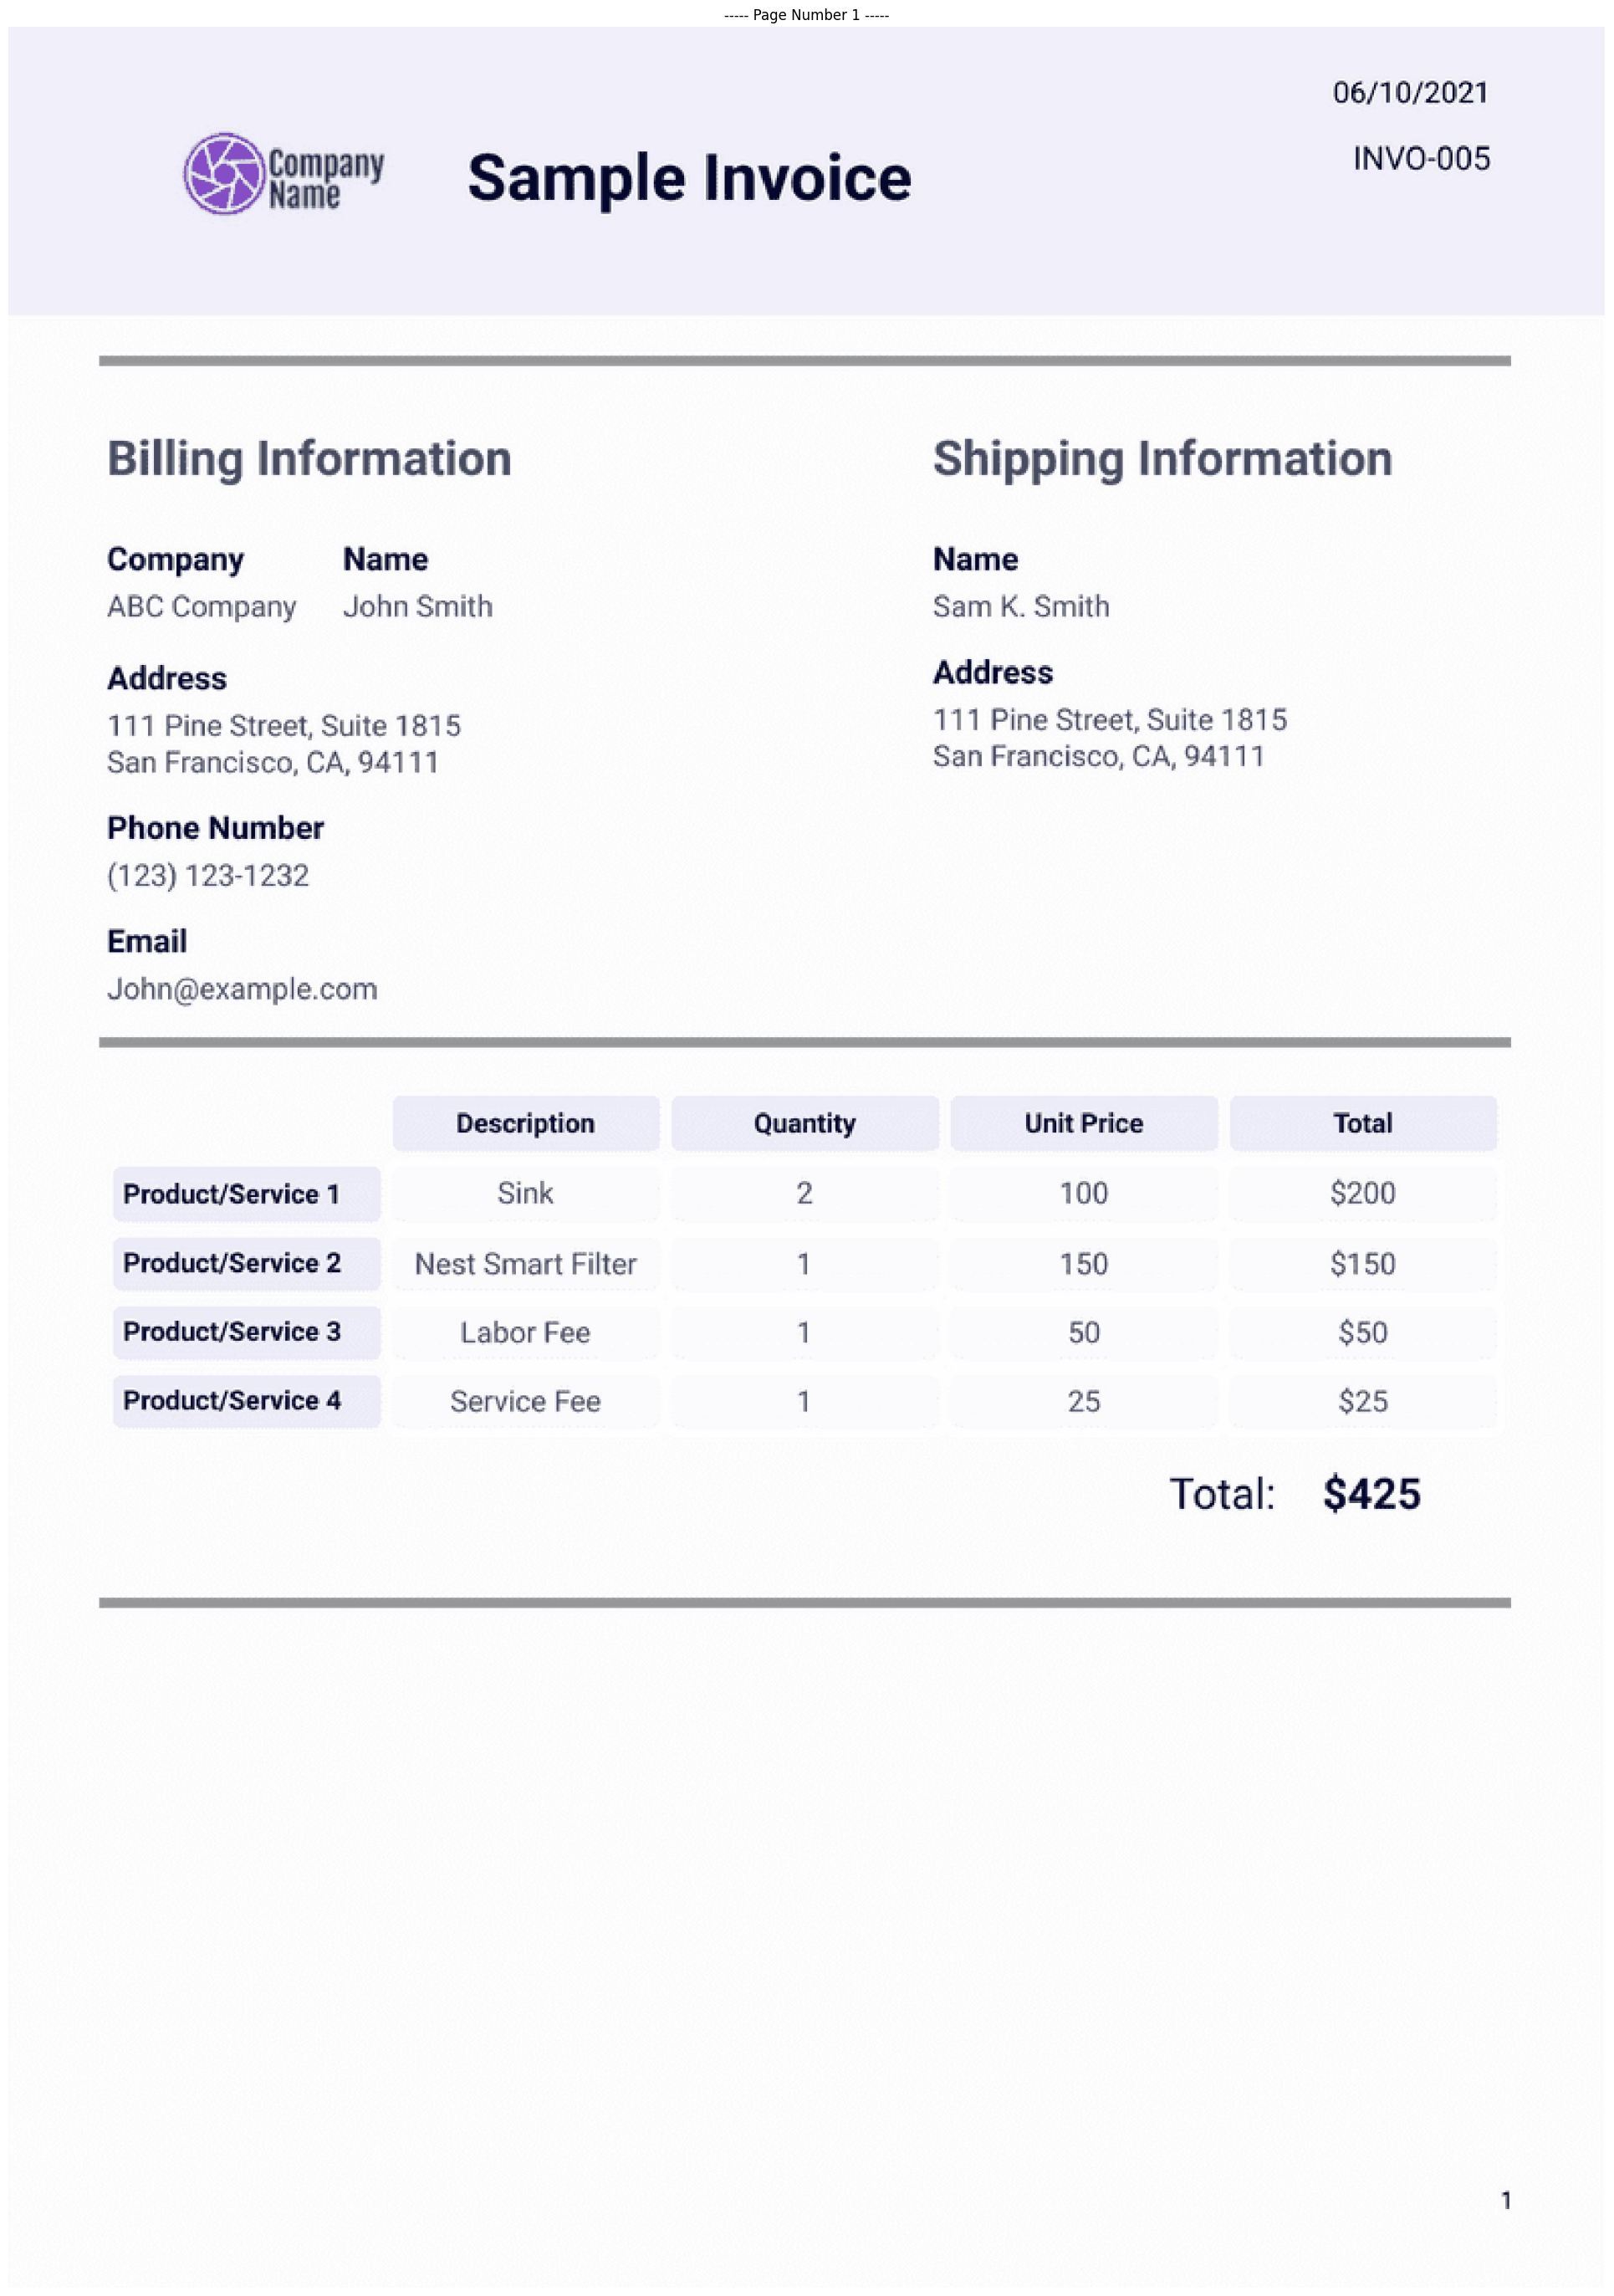

In [ ]:
display_images(convert_pdf_to_images)


In [ ]:
!pip install easyocr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 26.7 MB/s eta 0:00:00


In [ ]:
from easyocr import Reader


In [ ]:
language_reader = Reader(["en"])


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
def extract_text_with_easyocr(list_dict_final_images):

    image_list = [list(data.values())[0] for data in list_dict_final_images]
    image_content = []

    for index, image_bytes in enumerate(image_list):

        image = Image.open(BytesIO(image_bytes))
        raw_text = language_reader.readtext(image)
        raw_text = "\n".join([res[1] for res in raw_text])

        image_content.append(raw_text)

    return "\n".join(image_content)

In [ ]:
text_with_easy_ocr = extract_text_with_easyocr(convert_pdf_to_images)
print(text_with_easy_ocr)

06/10/2021
Gameany
Sample Invoice
INVO-005
Billing Information
Shipping Information
Company
Name
Name
ABC Company
John Smith
Sam K Smith
Address
Address
111 Pine Street, Suite 1815
111 Pine Street; Suite 1815
San Francisco, CA, 94111
San Francisco, CA, 94111
Phone Number
(123) 123-1232
Email
John@example com
Description
Quantity
Unit Price
Total
Product/Service 1
Sink
2
100
S200
Product/Service 2
Nest Smart Filter
150
S150
Product/Service 3
Labor Fee
1
50
S50
Product/Service 4
Service Fee
1
25
S25
Total:
S425


In [ ]:
import re

def extract_invoice_info(text):
    # 1. Invoice Date
    date_match = re.search(r'\b(\d{2}/\d{2}/\d{4})\b', text)
    invoice_date = date_match.group(1) if date_match else None

    # 2. Invoice Number
    invoice_number_match = re.search(r'INVO-\d+', text)
    invoice_number = invoice_number_match.group() if invoice_number_match else None

    # 3. Billing Information
    billing_info_match = re.search(r'Billing Information[\s\S]+?Company\nName\n(.+?)\n', text)
    billing_info = billing_info_match.group(1) if billing_info_match else None

    company_info_match = re.search(r'Company\nName\n(.+?)\nAddress\n(.+?)\nPhone Number\n(.+?)\nEmail\n(.+?)\n', text)
    company_name, company_address, phone_number, email = (
        company_info_match.group(1), company_info_match.group(2),
        company_info_match.group(3), company_info_match.group(4)
    ) if company_info_match else (None, None, None, None)

    # 4. Shipping Information
    shipping_info_match = re.search(r'Shipping Information[\s\S]+?Address\n(.+?)\n', text)
    shipping_info = shipping_info_match.group(1) if shipping_info_match else None

    # 5. Email
    email_match = re.search(r'Email\n(.+?)\n', text)
    email = email_match.group(1) if email_match else None

    # 6. Total Invoice Amount
    total_amount_match = re.search(r'Total:\n([^\n]+)', text)
    total_amount = total_amount_match.group(1) if total_amount_match else None

    # 7. Number of Items in the Invoice
    items_count = text.count('Product/Service')

    return {
        'Invoice Date': invoice_date,
        'Invoice Number': invoice_number,
        'Billing Information': billing_info,
        'Shipping Information': shipping_info,
        'Email': email,
        'Total Invoice Amount': total_amount,
        'Number of Items in the Invoice': items_count
    }



In [ ]:
text_with_easy_ocr = """
06/10/2021
Gameany
Sample Invoice
INVO-005
Billing Information
Shipping Information
Company
Name
Name
ABC Company
John Smith
Sam K Smith
Address
Address
111 Pine Street, Suite 1815
111 Pine Street; Suite 1815
San Francisco, CA, 94111
San Francisco, CA, 94111
Phone Number
(123) 123-1232
Email
John@example com
Description
Quantity
Unit Price
Total
Product/Service 1
Sink
2
100
S200
Product/Service 2
Nest Smart Filter
150
S150
Product/Service 3
Labor Fee
1
50
S50
Product/Service 4
Service Fee
1
25
S25
Total:
S425.
"""

# Example usage:
result = extract_invoice_info(text_with_easy_ocr)

# Print the extracted information
for key, value in result.items():
    print(f"{key}: {value}")


Invoice Date: 06/10/2021
Invoice Number: INVO-005
Billing Information: Name
Shipping Information: Address
Email: John@example com
Total Invoice Amount: S425.
Number of Items in the Invoice: 4
